In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# import data

In [2]:
path = "../data/process/"
file_name = "churn_labels_final.csv"
churn_labels = pd.read_csv(path + file_name)

churn_labels.head()




,member_id,signup_date,churn,outreach,n_sessions,sessions_vs_median,log_sessions_vs_median,std_sessions_per_day,active_days_normalized,dominant_period_of_day,...,1_claims_icd_pca,2_claims_icd_pca,3_claims_icd_pca,4_claims_icd_pca,5_claims_icd_pca,6_claims_icd_pca,7_claims_icd_pca,8_claims_icd_pca,9_claims_icd_pca,10_claims_icd_pca
0,1,2024-04-12,0,0,6.0,0.6,0.470004,0.000000,0.428571,Day,...,0.268483,0.585375,-1.365640,-0.626557,0.112018,2.432444,-1.589166,-0.669947,0.093225,-6.680343e-15
1,2,2025-03-11,0,0,10.0,1.0,0.693147,0.786796,0.500000,Evening,...,1.650850,-0.286552,-0.110948,0.430951,0.200201,-0.522572,-0.310045,0.886502,0.672074,4.421887e-15
2,3,2024-09-27,0,0,9.0,0.9,0.641854,0.353553,0.571429,Night,...,-1.021805,-0.247032,-0.841844,0.731794,2.724923,0.060970,-0.014320,2.007541,-2.109301,2.279216e-15
3,4,2024-04-16,1,0,10.0,1.0,0.693147,0.462910,0.571429,Day,...,1.219756,-0.760080,2.275275,-1.902187,0.280237,0.930802,-1.228815,-1.313458,-0.171992,-3.493943e-15
4,5,2024-03-12,0,1,10.0,1.0,0.693147,0.462910,0.571429,Day,...,0.618902,-0.041463,-0.528000,0.419527,1.629967,-0.084786,-0.030356,1.197186,-1.153545,3.543450e-15


# First look

In [3]:
churn_labels.describe()

,member_id,churn,outreach,n_sessions,sessions_vs_median,log_sessions_vs_median,std_sessions_per_day,active_days_normalized,Night,Day,...,1_claims_icd_pca,2_claims_icd_pca,3_claims_icd_pca,4_claims_icd_pca,5_claims_icd_pca,6_claims_icd_pca,7_claims_icd_pca,8_claims_icd_pca,9_claims_icd_pca,10_claims_icd_pca
count,10000.00000,10000.000000,10000.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,...,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03
mean,5000.50000,0.202100,0.398400,9.780856,0.978086,0.665370,0.578052,0.497714,33.352151,33.304712,...,2.954662e-17,6.407700e-18,-4.271800e-18,-4.271800e-18,6.763683e-18,1.566327e-17,-5.339750e-18,1.708720e-17,3.559833e-18,-9.979720e-18
std,2886.89568,0.401587,0.489593,3.625525,0.362552,0.183683,0.311018,0.147577,16.321851,16.537391,...,1.103817e+00,1.075700e+00,1.066639e+00,1.052562e+00,1.046212e+00,1.042940e+00,1.036769e+00,1.034918e+00,1.025488e+00,4.393026e-15
min,1.00000,0.000000,0.000000,1.000000,0.100000,0.095310,0.000000,0.071429,0.000000,0.000000,...,-2.485416e+00,-3.737385e+00,-3.129543e+00,-3.092491e+00,-4.696613e+00,-4.457442e+00,-3.437636e+00,-2.792240e+00,-4.330157e+00,-1.692764e-14
25%,2500.75000,0.000000,0.000000,7.000000,0.700000,0.530628,0.440959,0.428571,22.222222,22.222222,...,-7.574504e-01,-6.807861e-01,-7.098393e-01,-6.894683e-01,-6.442452e-01,-6.518455e-01,-6.761646e-01,-7.263640e-01,-6.352434e-01,-2.933141e-15
50%,5000.50000,0.000000,0.000000,10.000000,1.000000,0.693147,0.527046,0.500000,33.333333,33.333333,...,-1.848915e-02,-6.400769e-02,-2.991122e-02,-2.746432e-02,-2.498388e-02,-5.096828e-02,-8.640511e-02,-2.154249e-01,3.988671e-02,-3.295757e-16
75%,7500.25000,0.000000,1.000000,12.000000,1.200000,0.788457,0.755929,0.571429,42.857143,42.857143,...,7.127267e-01,6.373778e-01,6.731285e-01,6.496980e-01,6.081429e-01,5.929160e-01,5.936149e-01,5.720078e-01,6.331104e-01,2.542375e-15
max,10000.00000,1.000000,1.000000,26.000000,2.600000,1.280934,2.236068,1.000000,100.000000,100.000000,...,3.207954e+00,4.941977e+00,4.526980e+00,4.231293e+00,5.648748e+00,5.831597e+00,6.245924e+00,7.399193e+00,5.100780e+00,2.026483e-14


In [4]:
# Create one-hot encoding for 'dominant_period_of_day' for Night, Day, Evening
churn_labels["dominant_period_of_day_Night"] = (churn_labels["dominant_period_of_day"] == "Night").astype(int)
churn_labels["dominant_period_of_day_Day"] = (churn_labels["dominant_period_of_day"] == "Day").astype(int)
churn_labels["dominant_period_of_day_Evening"] = (churn_labels["dominant_period_of_day"] == "Evening").astype(int)


In [5]:
churn_labels.columns

Index(['member_id', 'signup_date', 'churn', 'outreach', 'n_sessions',
       'sessions_vs_median', 'log_sessions_vs_median', 'std_sessions_per_day',
       'active_days_normalized', 'dominant_period_of_day', 'Night', 'Day',
       'Evening', '1_web_visits_pca', '2_web_visits_pca', '3_web_visits_pca',
       '4_web_visits_pca', '5_web_visits_pca', '6_web_visits_pca',
       '7_web_visits_pca', '8_web_visits_pca', '9_web_visits_pca',
       '10_web_visits_pca', '11_web_visits_pca', '12_web_visits_pca',
       '13_web_visits_pca', '14_web_visits_pca', '15_web_visits_pca',
       '16_web_visits_pca', '17_web_visits_pca', '18_web_visits_pca',
       '19_web_visits_pca', '20_web_visits_pca', '21_web_visits_pca',
       '22_web_visits_pca', '23_web_visits_pca', '24_web_visits_pca',
       '25_web_visits_pca', '26_web_visits_pca', '1_claims_icd_pca',
       '2_claims_icd_pca', '3_claims_icd_pca', '4_claims_icd_pca',
       '5_claims_icd_pca', '6_claims_icd_pca', '7_claims_icd_pca',
       '8_c

In [6]:
churn_labels_outreach = churn_labels[churn_labels['outreach'] == 1]
churn_labels_not_outreach = churn_labels[churn_labels['outreach'] == 0]

## churn_labels_outreach

In [7]:
features = churn_labels_outreach.drop(columns=['member_id', 'churn', 'outreach', 'signup_date']).columns
targets = 'churn'

LogisticRegression: Mean AUC: 0.6356 ± 0.0143 | OOF AUC: 0.6362
RandomForest: Mean AUC: 0.6306 ± 0.0293 | OOF AUC: 0.6299
XGBoost: Mean AUC: 0.6057 ± 0.0227 | OOF AUC: 0.6052


/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: Mean AUC: 0.5989 ± 0.0211 | OOF AUC: 0.5988
Best model: LogisticRegression with Mean CV AUC: 0.6356


/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


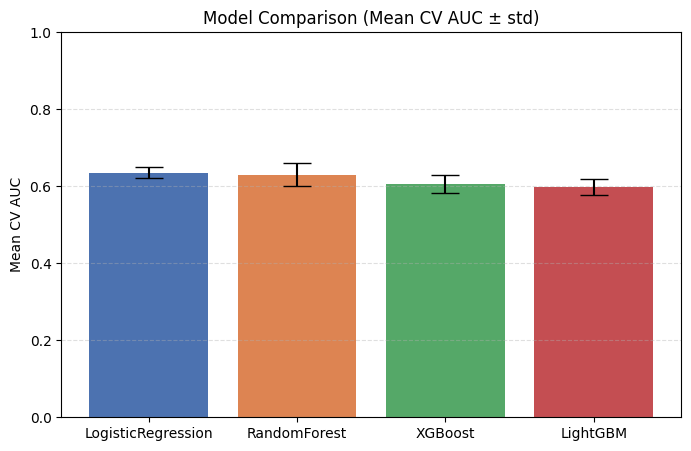

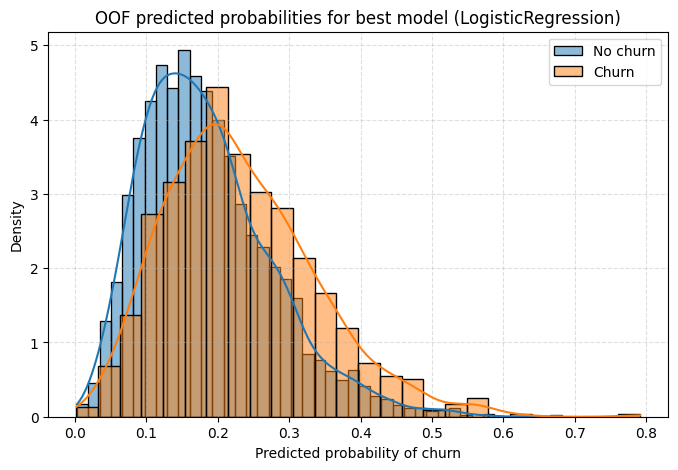

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
import pandas as pd
import os

# Suppress UserWarnings from xgboost and lightgbm for cleaner output
# Also suppress LightGBM "No further splits with positive gain" messages
import sys
import contextlib

class SuppressLGBSplitGain(contextlib.ContextDecorator):
    def __enter__(self):
        self._stdout = sys.stdout
        self._stderr = sys.stderr
        self.devnull = open(os.devnull, 'w')
        sys.stdout = self.devnull
        sys.stderr = self.devnull
        return self
    def __exit__(self, exc_type, exc, tb):
        sys.stdout = self._stdout
        sys.stderr = self._stderr
        self.devnull.close()

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        category=UserWarning,
        module='xgboost|lightgbm',
    )

    # Preprocess features (convert any object or category columns)
    X = churn_labels_outreach[features].copy()
    for col in X.select_dtypes(include='object').columns:
        X[col] = X[col].astype('category').cat.codes
    for col in X.select_dtypes(include='category').columns:
        X[col] = X[col].cat.codes

    # Impute missing values (NaN) with the feature median (safe for both sklearn & tree models)
    imputer = SimpleImputer(strategy="median")
    X_imputed = imputer.fit_transform(X)

    y = churn_labels_outreach[targets].values  # Make y a numpy array to match imputed X

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Four models to compare (with simple, reasonable hyperparams)
    models = {
        "LogisticRegression": LogisticRegression(solver="lbfgs", max_iter=500),
        "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42, n_jobs=-1),
        "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42, verbosity=0),
        "LightGBM": lgb.LGBMClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
    }

    results = {}
    best_model_name = None
    best_auc = 0
    best_oof_preds = None

    for model_name, model in models.items():
        oof_preds = np.zeros(X_imputed.shape[0])
        auc_scores = []
        for fold, (train_idx, val_idx) in enumerate(cv.split(X_imputed, y)):
            X_train, X_val = X_imputed[train_idx], X_imputed[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            # Suppress LGBM split gain warning only for LightGBM
            if model_name == "LightGBM":
                with SuppressLGBSplitGain():
                    model.fit(X_train, y_train)
            else:
                model.fit(X_train, y_train)
            if hasattr(model, "predict_proba"):
                y_pred_proba = model.predict_proba(X_val)[:, 1]
            else:
                y_pred_proba = model.decision_function(X_val)
            oof_preds[val_idx] = y_pred_proba
            auc = roc_auc_score(y_val, y_pred_proba)
            auc_scores.append(auc)
        overall_auc = roc_auc_score(y, oof_preds)
        results[model_name] = {
            "fold_auc_scores": auc_scores,
            "mean_auc": np.mean(auc_scores),
            "std_auc": np.std(auc_scores),
            "overall_oof_auc": overall_auc,
            "oof_preds": oof_preds.copy()
        }
        print(f"{model_name}: Mean AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f} | OOF AUC: {overall_auc:.4f}")
        if np.mean(auc_scores) > best_auc:
            best_auc = np.mean(auc_scores)
            best_model_name = model_name
            best_oof_preds = oof_preds.copy()

    print(f"Best model: {best_model_name} with Mean CV AUC: {best_auc:.4f}")

    # Save the results
    joblib.dump({
        'results': results,
        'best_model': best_model_name,
        'best_oof_preds': best_oof_preds,
        'labels': y,
        'features': features.tolist(),
        'imputer': imputer
    }, 'model_comparison_cv_results_outreach.joblib')

    # Visual: Barplot of all models' mean AUC using matplotlib (handles yerr robustly)
    auc_df = pd.DataFrame({
        "Model": list(results.keys()),
        "Mean_AUC": [results[m]["mean_auc"] for m in results],
        "Std_AUC": [results[m]["std_auc"] for m in results]
    })
    plt.figure(figsize=(8, 5))
    plt.bar(
        auc_df["Model"],
        auc_df["Mean_AUC"],
        yerr=auc_df["Std_AUC"],
        capsize=10,
        color=sns.color_palette("deep", n_colors=len(auc_df["Model"]))
    )
    plt.ylabel("Mean CV AUC")
    plt.title("Model Comparison (Mean CV AUC ± std)")
    plt.grid(True, linestyle='--', alpha=0.4, axis='y')
    plt.ylim(0.0, 1.0)
    plt.show()

    # Visual: Distribution of OOF predictions for the best model
    plt.figure(figsize=(8,5))
    sns.histplot(best_oof_preds[y==0], label="No churn", color="C0", kde=True, stat="density")
    sns.histplot(best_oof_preds[y==1], label="Churn", color="C1", kde=True, stat="density")
    plt.title(f"OOF predicted probabilities for best model ({best_model_name})")
    plt.xlabel("Predicted probability of churn")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _

Best LogisticRegression params: {'C': 0.01, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best LogisticRegression CV AUC: 0.6427808122416229
Best LogisticRegression CV accuracy: 0.8059740358000795
Best LogisticRegression CV F1: 0.0
Best LogisticRegression CV precision: 0.0
Best LogisticRegression CV recall: 0.0


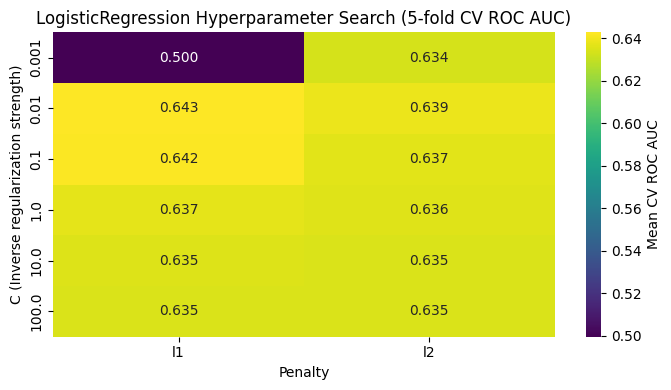

/var/folders/5j/q5gswhks43xd2b8qncz5699m0000gn/T/ipykernel_63747/1070741267.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


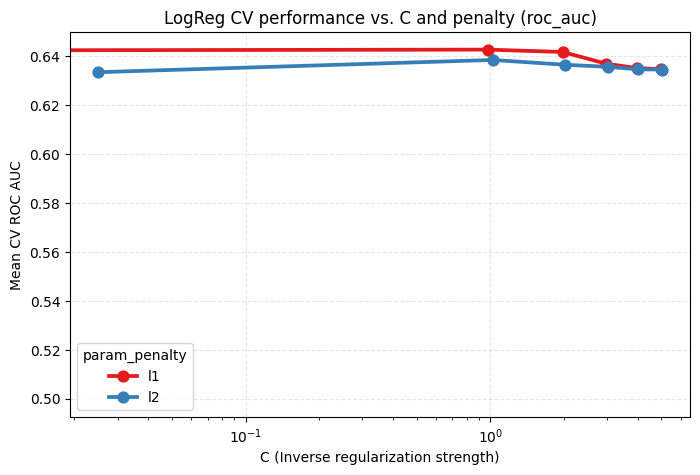

/var/folders/5j/q5gswhks43xd2b8qncz5699m0000gn/T/ipykernel_63747/1070741267.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


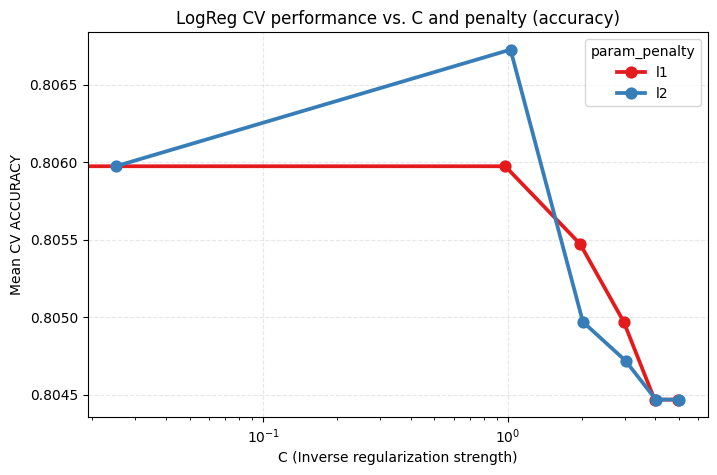

/var/folders/5j/q5gswhks43xd2b8qncz5699m0000gn/T/ipykernel_63747/1070741267.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


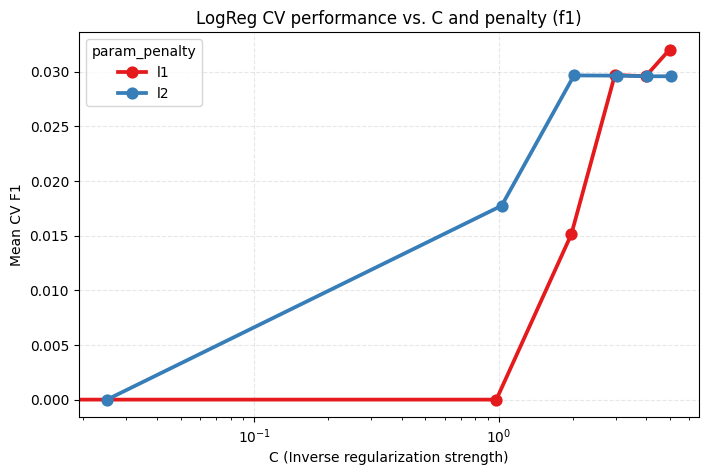

/var/folders/5j/q5gswhks43xd2b8qncz5699m0000gn/T/ipykernel_63747/1070741267.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


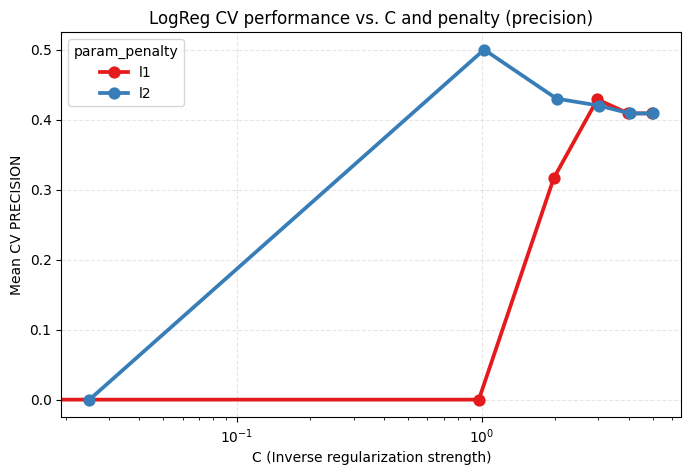

/var/folders/5j/q5gswhks43xd2b8qncz5699m0000gn/T/ipykernel_63747/1070741267.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


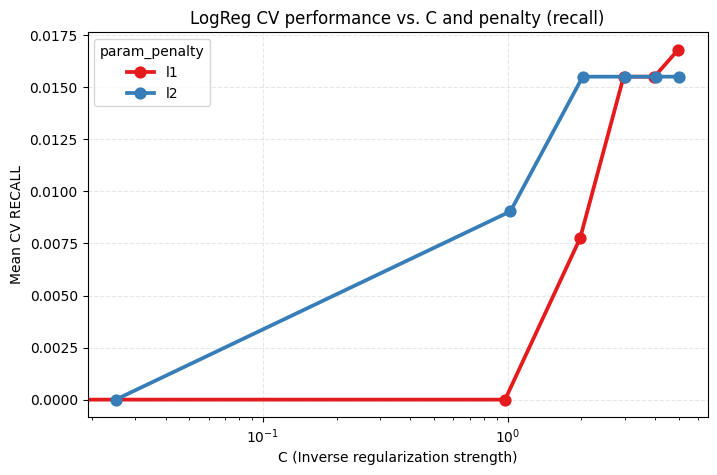

,Model,Best Params,Best Mean CV AUC,Best Mean CV Accuracy,Best Mean CV F1,Best Mean CV Precision,Best Mean CV Recall
0,LogisticRegression,"{'C': 0.01, 'max_iter': 500, 'penalty': 'l1', ...",0.642781,0.805974,0.0,0.0,0.0


In [9]:
# Hyperparameter optimization for LogisticRegression using cross-validated ROC AUC and visualizing the results
# PLUS: add extra metrics to evaluate the model

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    make_scorer, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grid
lr_param_grid = {
    "C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],  # must be liblinear for l1
    "max_iter": [500],
}

# Set up cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Extra metrics for evaluation
lr_scoring = {
    "roc_auc": "roc_auc",
    "accuracy": make_scorer(accuracy_score),
    "f1": make_scorer(f1_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score)
}

# GridSearchCV with cross-validation - refit on best ROC AUC
lr_grid = GridSearchCV(
    LogisticRegression(),
    lr_param_grid,
    cv=cv,
    scoring=lr_scoring,
    refit="roc_auc",
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
lr_grid.fit(X_imputed, y)

# Best results
print("Best LogisticRegression params:", lr_grid.best_params_)
print("Best LogisticRegression CV AUC:", lr_grid.best_score_)
print("Best LogisticRegression CV accuracy:", lr_grid.cv_results_['mean_test_accuracy'][lr_grid.best_index_])
print("Best LogisticRegression CV F1:", lr_grid.cv_results_['mean_test_f1'][lr_grid.best_index_])
print("Best LogisticRegression CV precision:", lr_grid.cv_results_['mean_test_precision'][lr_grid.best_index_])
print("Best LogisticRegression CV recall:", lr_grid.cv_results_['mean_test_recall'][lr_grid.best_index_])

# Collate results into a dataframe for visualization
cv_results = pd.DataFrame(lr_grid.cv_results_)

# Visualization: heatmap of mean ROC AUC test scores for each (C, penalty)
heatmap_pivot_auc = cv_results.pivot(
    index="param_C", columns="param_penalty", values="mean_test_roc_auc"
)
plt.figure(figsize=(7,4))
sns.heatmap(
    heatmap_pivot_auc,
    annot=True, fmt=".3f", cmap="viridis",
    cbar_kws={"label": "Mean CV ROC AUC"}
)
plt.title("LogisticRegression Hyperparameter Search (5-fold CV ROC AUC)")
plt.ylabel("C (Inverse regularization strength)")
plt.xlabel("Penalty")
plt.tight_layout()
plt.show()

# Optionally: Visualize spread of scores per C and penalty for all metrics
metrics_to_plot = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall']
for metric in metrics_to_plot:
    plt.figure(figsize=(8,5))
    sns.pointplot(
        data=cv_results,
        x="param_C", y=f"mean_test_{metric}", hue="param_penalty",
        dodge=True, markers="o", capsize=.2, errwidth=1,
        palette="Set1",
        errorbar=('ci', 95)
    )
    plt.xscale("log")
    plt.ylabel(f"Mean CV {metric.replace('_', ' ').upper()}")
    plt.title(f"LogReg CV performance vs. C and penalty ({metric})")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.xlabel("C (Inverse regularization strength)")
    plt.show()

# Save summarized results as table, display as well
hyperopt_results = pd.DataFrame([{
    "Model": "LogisticRegression",
    "Best Params": lr_grid.best_params_,
    "Best Mean CV AUC": lr_grid.best_score_,
    "Best Mean CV Accuracy": lr_grid.cv_results_['mean_test_accuracy'][lr_grid.best_index_],
    "Best Mean CV F1": lr_grid.cv_results_['mean_test_f1'][lr_grid.best_index_],
    "Best Mean CV Precision": lr_grid.cv_results_['mean_test_precision'][lr_grid.best_index_],
    "Best Mean CV Recall": lr_grid.cv_results_['mean_test_recall'][lr_grid.best_index_],
}])
hyperopt_results

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _

Best RandomForest params (by ROC AUC): {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best RandomForest CV ROC AUC: 0.6347725166965604
Other metrics for best params:
  Accuracy: 0.8059740358000795
  F1:       0.0
  Precision: 0.0
  Recall:    0.0


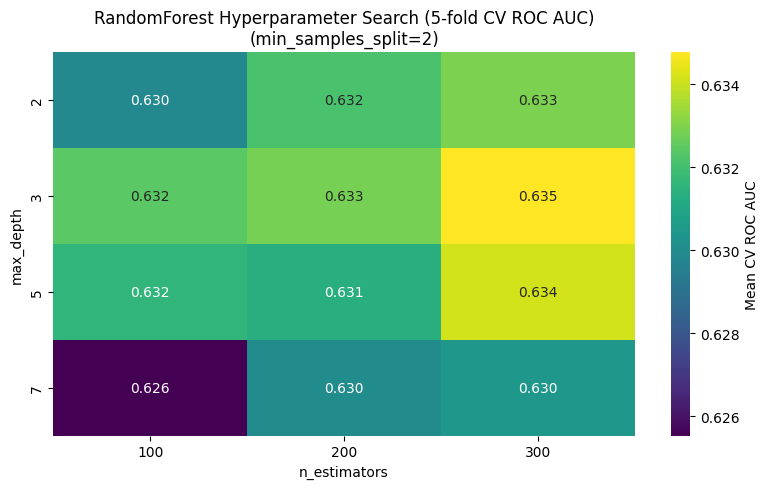

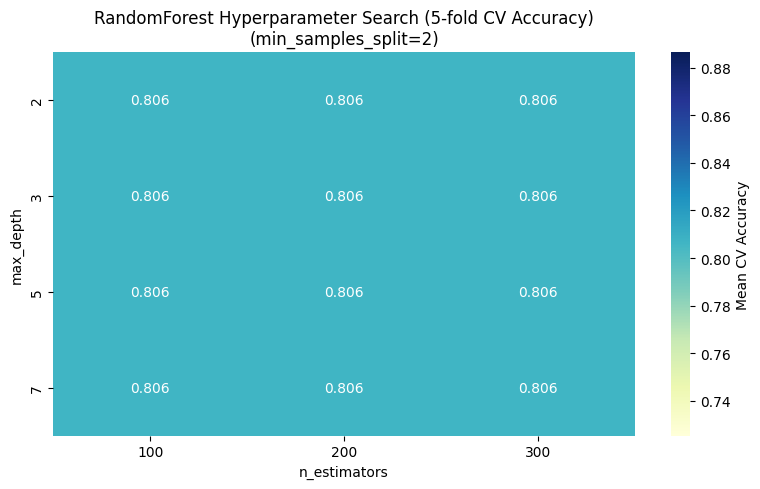

/var/folders/5j/q5gswhks43xd2b8qncz5699m0000gn/T/ipykernel_63747/1622098883.py:111: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


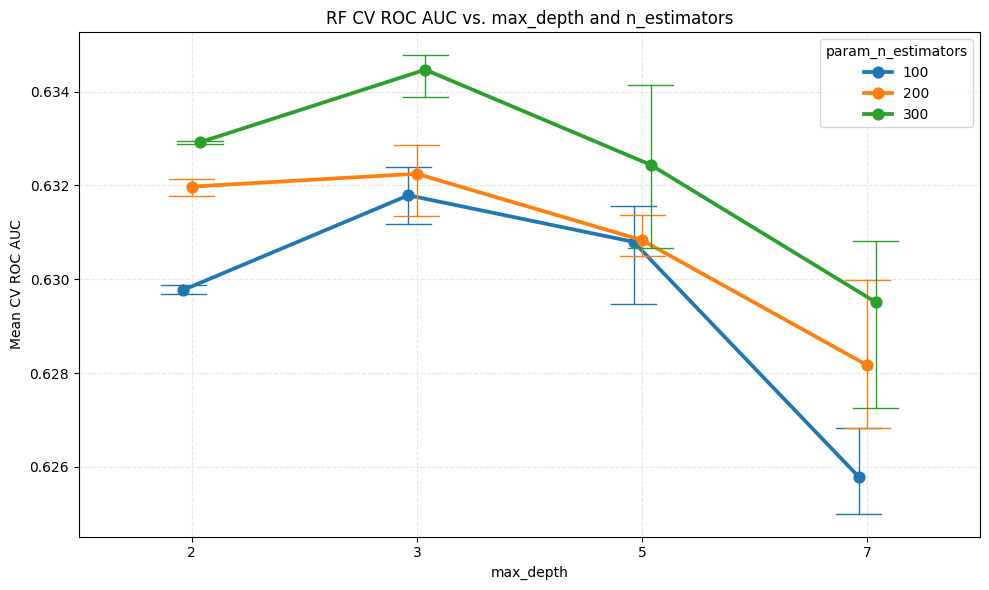

/var/folders/5j/q5gswhks43xd2b8qncz5699m0000gn/T/ipykernel_63747/1622098883.py:131: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


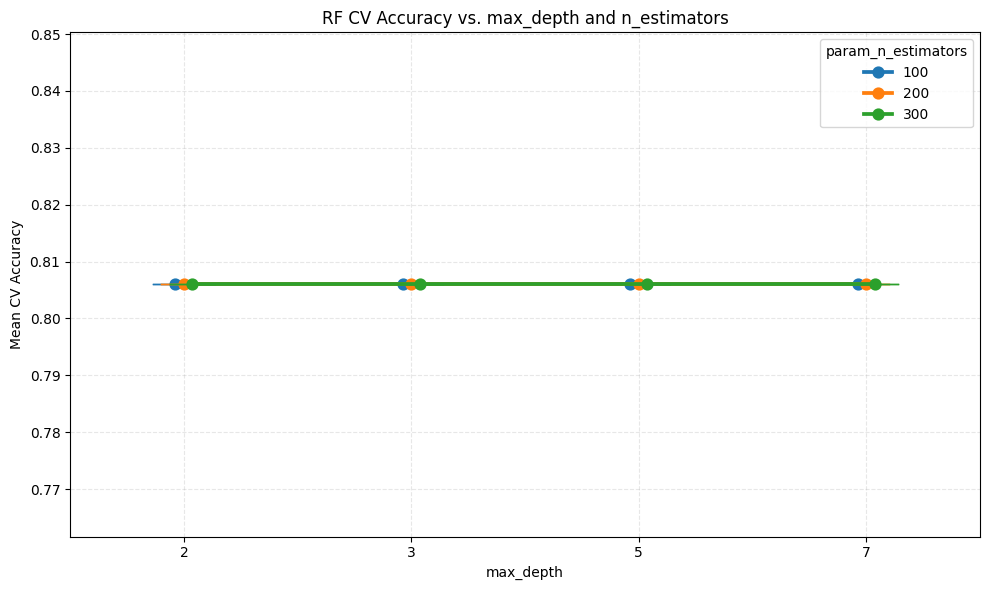

,Model,Best Params,Best Mean CV ROC AUC,Best Mean CV Accuracy,Best Mean CV F1,Best Mean CV Precision,Best Mean CV Recall
0,RandomForestClassifier,"{'max_depth': 3, 'min_samples_split': 2, 'n_es...",0.634773,0.805974,0.0,0.0,0.0


In [10]:
# Hyperparameter optimization for RandomForestClassifier using multiple cross-validated metrics
# and visualizing ROC AUC and accuracy (other metrics can also be tracked)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

# Which metrics matter? 
# Besides ROC AUC (discrimination, ranking), important classification metrics include:
# - accuracy: overall fraction classified correctly (may be misleading if classes are imbalanced)
# - precision: fraction of predicted positives that are truly positive
# - recall (sensitivity): fraction of all positives that are detected
# - f1: harmonic mean of precision & recall (good for imbalanced classes)
# - ROC AUC: overall ranking/discrimination metric (good for threshold-free comparisons)

# Define parameter grid for RandomForest
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [2, 3, 5, 7],
    "min_samples_split": [2, 5, 10]
}

# Set up cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a dict of metrics for GridSearchCV scoring
rf_scoring = {
    "roc_auc": "roc_auc",
    "accuracy": make_scorer(accuracy_score),
    "f1": make_scorer(f1_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score)
}

# GridSearchCV - optimize for ROC AUC, record other metrics
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=cv,
    scoring=rf_scoring,
    refit="roc_auc",   # refit using ROC AUC for best_estimator_
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
rf_grid.fit(X_imputed, y)

# Print best results for all tracked metrics
print("Best RandomForest params (by ROC AUC):", rf_grid.best_params_)
print("Best RandomForest CV ROC AUC:", rf_grid.best_score_)

# Get test scores for all metrics for the best params
best_idx = rf_grid.best_index_
print("Other metrics for best params:")
print("  Accuracy:", rf_grid.cv_results_["mean_test_accuracy"][best_idx])
print("  F1:      ", rf_grid.cv_results_["mean_test_f1"][best_idx])
print("  Precision:", rf_grid.cv_results_["mean_test_precision"][best_idx])
print("  Recall:   ", rf_grid.cv_results_["mean_test_recall"][best_idx])

# Collate results into a dataframe for visualization
rf_cv_results = pd.DataFrame(rf_grid.cv_results_)

# Prepare plot-friendly version of max_depth (None -> "None")
rf_cv_results['param_max_depth_plot'] = rf_cv_results['param_max_depth'].apply(lambda x: str(x) if x is None else x)

# --- Heatmap: mean CV ROC AUC for (max_depth, n_estimators) at min_samples_split=2 ---
pivot_data = rf_cv_results[rf_cv_results["param_min_samples_split"] == 2].copy()
pivot_data['param_max_depth_plot'] = pivot_data['param_max_depth'].apply(lambda x: str(x) if x is None else x)
def _depth_sorter(val):
    if val == 'None':
        return float('inf')
    return int(val)
depth_order = sorted(pivot_data['param_max_depth_plot'].unique(), key=_depth_sorter)
nest_order = sorted(pivot_data['param_n_estimators'].unique())

# ROC AUC heatmap
heatmap_pivot_rf = pivot_data.pivot(
    index="param_max_depth_plot", columns="param_n_estimators", values="mean_test_roc_auc"
).reindex(index=depth_order)

plt.figure(figsize=(8,5))
sns.heatmap(
    heatmap_pivot_rf,
    annot=True, fmt=".3f", cmap="viridis",
    cbar_kws={"label": "Mean CV ROC AUC"}
)
plt.title("RandomForest Hyperparameter Search (5-fold CV ROC AUC)\n(min_samples_split=2)")
plt.ylabel("max_depth")
plt.xlabel("n_estimators")
plt.tight_layout()
plt.show()

# Accuracy heatmap (as an additional metric)
heatmap_pivot_rf_acc = pivot_data.pivot(
    index="param_max_depth_plot", columns="param_n_estimators", values="mean_test_accuracy"
).reindex(index=depth_order)

plt.figure(figsize=(8,5))
sns.heatmap(
    heatmap_pivot_rf_acc,
    annot=True, fmt=".3f", cmap="YlGnBu",
    cbar_kws={"label": "Mean CV Accuracy"}
)
plt.title("RandomForest Hyperparameter Search (5-fold CV Accuracy)\n(min_samples_split=2)")
plt.ylabel("max_depth")
plt.xlabel("n_estimators")
plt.tight_layout()
plt.show()

# Optionally, visualize spread of scores for all param combinations (ROC AUC)
plt.figure(figsize=(10,6))
sns.pointplot(
    data=rf_cv_results,
    x="param_max_depth_plot",
    y="mean_test_roc_auc",
    hue="param_n_estimators",
    order=depth_order,
    hue_order=nest_order,
    dodge=True, markers="o", capsize=.2, errwidth=1,
    palette="tab10",
    errorbar=('ci', 95)
)
plt.ylabel("Mean CV ROC AUC")
plt.title("RF CV ROC AUC vs. max_depth and n_estimators")
plt.xlabel("max_depth")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Optionally, pointplot visualization for accuracy as well:
plt.figure(figsize=(10,6))
sns.pointplot(
    data=rf_cv_results,
    x="param_max_depth_plot",
    y="mean_test_accuracy",
    hue="param_n_estimators",
    order=depth_order,
    hue_order=nest_order,
    dodge=True, markers="o", capsize=.2, errwidth=1,
    palette="tab10",
    errorbar=('ci', 95)
)
plt.ylabel("Mean CV Accuracy")
plt.title("RF CV Accuracy vs. max_depth and n_estimators")
plt.xlabel("max_depth")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Save summarized results as table, display as well
rf_hyperopt_results = pd.DataFrame([{
    "Model": "RandomForestClassifier",
    "Best Params": rf_grid.best_params_,
    "Best Mean CV ROC AUC": rf_grid.best_score_,
    "Best Mean CV Accuracy": rf_grid.cv_results_["mean_test_accuracy"][best_idx],
    "Best Mean CV F1": rf_grid.cv_results_["mean_test_f1"][best_idx],
    "Best Mean CV Precision": rf_grid.cv_results_["mean_test_precision"][best_idx],
    "Best Mean CV Recall": rf_grid.cv_results_["mean_test_recall"][best_idx]
}])
rf_hyperopt_results


In [11]:
oof_preds

array([0.10427876, 0.08152232, 0.18345534, ..., 0.09858805, 0.16552003,
       0.08420331], shape=(3984,))

## churn_labels_not_outreach

LogisticRegression: Mean AUC: 0.6342 ± 0.0163 | OOF AUC: 0.6339
RandomForest: Mean AUC: 0.6290 ± 0.0165 | OOF AUC: 0.6280
XGBoost: Mean AUC: 0.6172 ± 0.0175 | OOF AUC: 0.6167


/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: Mean AUC: 0.6170 ± 0.0098 | OOF AUC: 0.6168
Best model (no outreach): LogisticRegression with Mean CV AUC: 0.6342


/Users/etaiczopp/Documents/Projects/ViLabs_HA_Etai/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


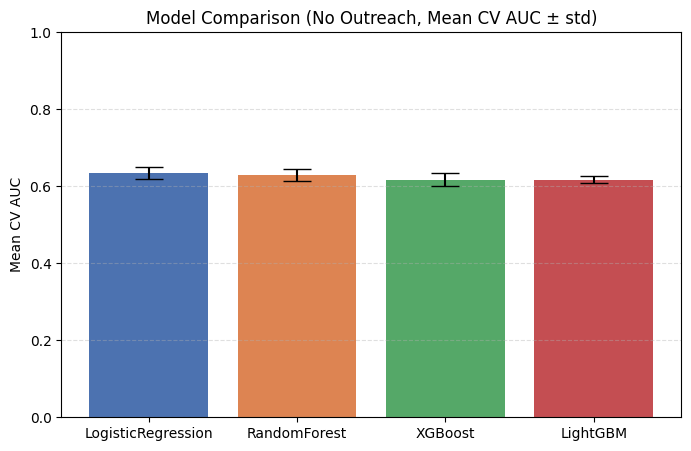

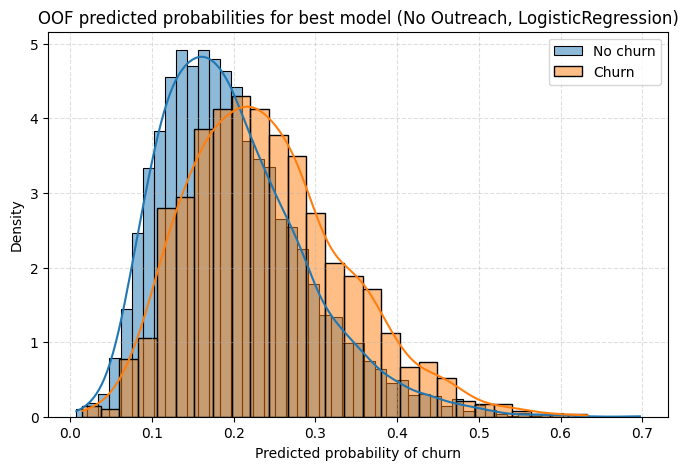

In [12]:

# Preprocess features for churn_labels_not_outreach
X_no_outreach = churn_labels_not_outreach[features].copy()
for col in X_no_outreach.select_dtypes(include='object').columns:
    X_no_outreach[col] = X_no_outreach[col].astype('category').cat.codes
for col in X_no_outreach.select_dtypes(include='category').columns:
    X_no_outreach[col] = X_no_outreach[col].cat.codes

# Impute missing values with the feature median
imputer_no_outreach = SimpleImputer(strategy="median")
X_no_outreach_imputed = imputer_no_outreach.fit_transform(X_no_outreach)

y_no_outreach = churn_labels_not_outreach[targets].values  # Make numpy array

cv_no_outreach = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_no_outreach = {
    "LogisticRegression": LogisticRegression(solver="lbfgs", max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42, verbosity=0),
    "LightGBM": lgb.LGBMClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
}

results_no_outreach = {}
best_model_name_no_outreach = None
best_auc_no_outreach = 0
best_oof_preds_no_outreach = None

for model_name, model in models_no_outreach.items():
    oof_preds = np.zeros(X_no_outreach_imputed.shape[0])
    auc_scores = []
    for fold, (train_idx, val_idx) in enumerate(cv_no_outreach.split(X_no_outreach_imputed, y_no_outreach)):
        X_train, X_val = X_no_outreach_imputed[train_idx], X_no_outreach_imputed[val_idx]
        y_train, y_val = y_no_outreach[train_idx], y_no_outreach[val_idx]
        # Suppress LGBM split gain warning only for LightGBM
        if model_name == "LightGBM":
            with SuppressLGBSplitGain():
                model.fit(X_train, y_train)
        else:
            model.fit(X_train, y_train)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_val)[:, 1]
        else:
            y_pred_proba = model.decision_function(X_val)
        oof_preds[val_idx] = y_pred_proba
        auc = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc)
    overall_auc = roc_auc_score(y_no_outreach, oof_preds)
    results_no_outreach[model_name] = {
        "fold_auc_scores": auc_scores,
        "mean_auc": np.mean(auc_scores),
        "std_auc": np.std(auc_scores),
        "overall_oof_auc": overall_auc,
        "oof_preds": oof_preds.copy()
    }
    print(f"{model_name}: Mean AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f} | OOF AUC: {overall_auc:.4f}")
    if np.mean(auc_scores) > best_auc_no_outreach:
        best_auc_no_outreach = np.mean(auc_scores)
        best_model_name_no_outreach = model_name
        best_oof_preds_no_outreach = oof_preds.copy()

print(f"Best model (no outreach): {best_model_name_no_outreach} with Mean CV AUC: {best_auc_no_outreach:.4f}")

# Save the results
joblib.dump({
    'results': results_no_outreach,
    'best_model': best_model_name_no_outreach,
    'best_oof_preds': best_oof_preds_no_outreach,
    'labels': y_no_outreach,
    'features': features.tolist(),
    'imputer': imputer_no_outreach
}, 'model_comparison_cv_results_no_outreach.joblib')

# Barplot of all models' mean AUC for "no outreach"
auc_df_no_outreach = pd.DataFrame({
    "Model": list(results_no_outreach.keys()),
    "Mean_AUC": [results_no_outreach[m]["mean_auc"] for m in results_no_outreach],
    "Std_AUC": [results_no_outreach[m]["std_auc"] for m in results_no_outreach]
})
plt.figure(figsize=(8, 5))
plt.bar(
    auc_df_no_outreach["Model"],
    auc_df_no_outreach["Mean_AUC"],
    yerr=auc_df_no_outreach["Std_AUC"],
    capsize=10,
    color=sns.color_palette("deep", n_colors=len(auc_df_no_outreach["Model"]))
)
plt.ylabel("Mean CV AUC")
plt.title("Model Comparison (No Outreach, Mean CV AUC ± std)")
plt.grid(True, linestyle='--', alpha=0.4, axis='y')
plt.ylim(0.0, 1.0)
plt.show()

# Visual: Distribution of OOF predictions for the best model (no outreach)
plt.figure(figsize=(8,5))
sns.histplot(best_oof_preds_no_outreach[y_no_outreach==0], label="No churn", color="C0", kde=True, stat="density")
sns.histplot(best_oof_preds_no_outreach[y_no_outreach==1], label="Churn", color="C1", kde=True, stat="density")
plt.title(f"OOF predicted probabilities for best model (No Outreach, {best_model_name_no_outreach})")
plt.xlabel("Predicted probability of churn")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()



Categorical columns to encode: ['dominant_period_of_day']
Total missing values in features BEFORE imputation: 380
Total missing values in features AFTER imputation: 0
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best LogisticRegression params: {'C': 0.01, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best LogisticRegression CV AUC: 0.6399846657854809
Best LogisticRegression CV accuracy: 0.792386972767417
Best LogisticRegression CV F1: 0.0
Best LogisticRegression CV precision: 0.0
Best LogisticRegression CV recall: 0.0


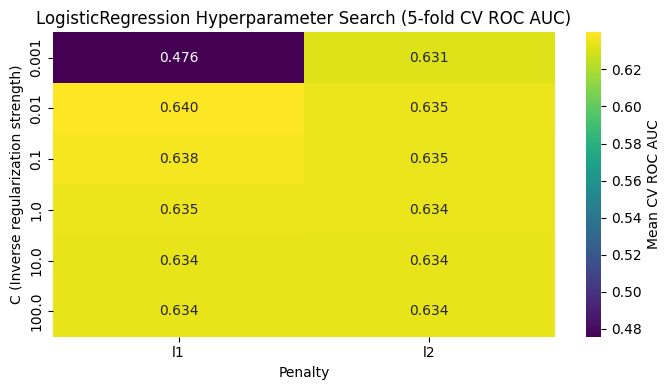

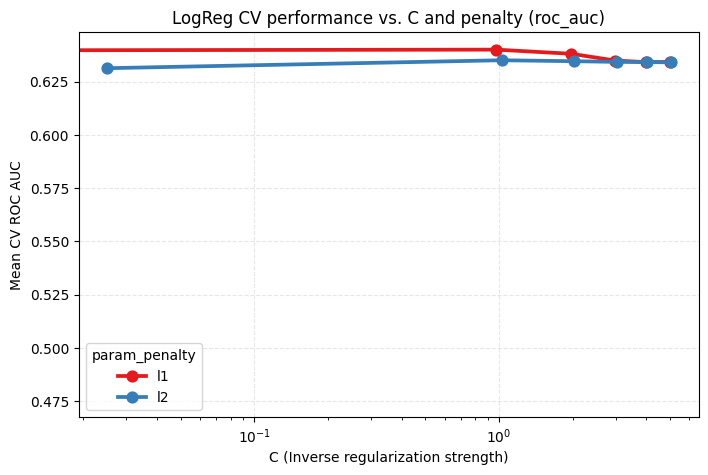

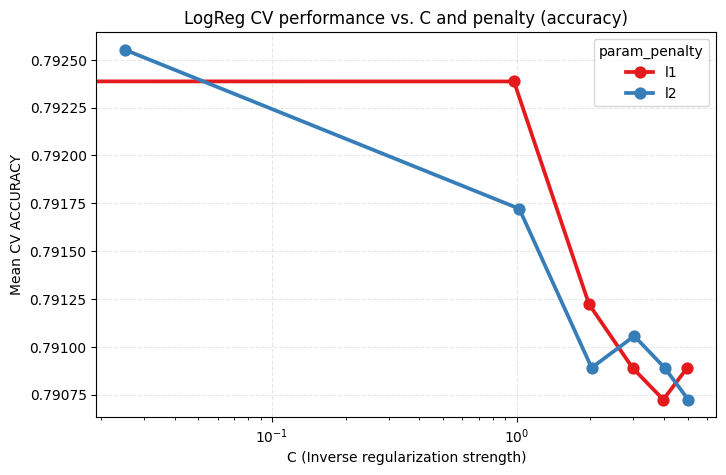

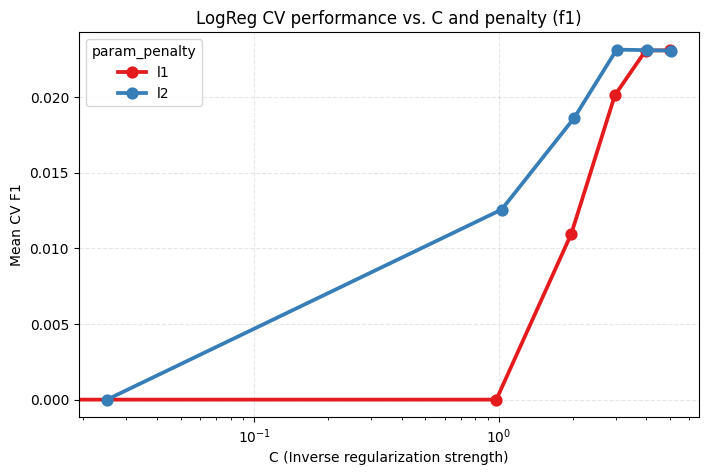

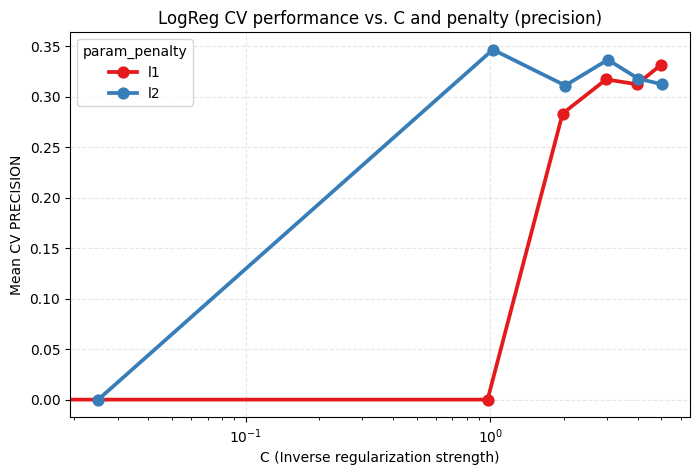

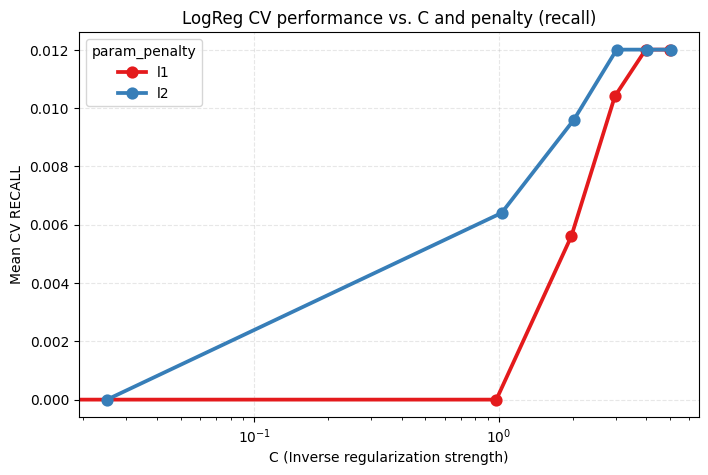

,Model,Best Params,Best Mean CV AUC,Best Mean CV Accuracy,Best Mean CV F1,Best Mean CV Precision,Best Mean CV Recall
0,LogisticRegression,"{'C': 0.01, 'max_iter': 500, 'penalty': 'l1', ...",0.639985,0.792387,0.0,0.0,0.0


In [13]:
# This cell performs hyperparameter search for LogisticRegression
# on the "no outreach" group, using `churn_labels_not_outreach`.
#
# FIX: Handle missing values (NaN) in the features
#     - After one-hot encoding, check for NaNs
#     - Impute missing values (e.g., with SimpleImputer, mean strategy)
#     - LogisticRegression requires all features to be numeric and finite

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
import numpy as np

# Use the correct feature set and target from churn_labels_not_outreach
features = churn_labels_not_outreach.drop(columns=['member_id', 'churn', 'outreach', 'signup_date']).columns
targets = 'churn'

# Explicitly one-hot encode any categorical variables
X = churn_labels_not_outreach[features].copy()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# For debugging, list detected categorical columns
print("Categorical columns to encode:", list(categorical_cols))
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

y = churn_labels_not_outreach[targets].copy()

# Check for missing values before imputation
n_missing_before = X_encoded.isna().sum().sum()
print("Total missing values in features BEFORE imputation:", n_missing_before)

# Impute any missing (NaN) values with mean imputation (SimpleImputer)
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X_encoded)
X_imputed = pd.DataFrame(X_imputed_array, columns=X_encoded.columns, index=X_encoded.index)

# Confirm no missing after imputation
n_missing_after = X_imputed.isna().sum().sum()
print("Total missing values in features AFTER imputation:", n_missing_after)

# Set up the hyperparameter grid
lr_param_grid = {
    "C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],  # required for l1 penalty
    "max_iter": [500],
}

# Configure cross-validation and metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_scoring = {
    "roc_auc": "roc_auc",
    "accuracy": make_scorer(accuracy_score),
    "f1": make_scorer(f1_score, zero_division=0),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
}

# Grid search
lr_grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=lr_param_grid,
    scoring=lr_scoring,
    refit="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    return_train_score=True,
)
lr_grid.fit(X_imputed, y)

# Print out top results
print("Best LogisticRegression params:", lr_grid.best_params_)
print("Best LogisticRegression CV AUC:", lr_grid.best_score_)
print("Best LogisticRegression CV accuracy:", lr_grid.cv_results_['mean_test_accuracy'][lr_grid.best_index_])
print("Best LogisticRegression CV F1:", lr_grid.cv_results_['mean_test_f1'][lr_grid.best_index_])
print("Best LogisticRegression CV precision:", lr_grid.cv_results_['mean_test_precision'][lr_grid.best_index_])
print("Best LogisticRegression CV recall:", lr_grid.cv_results_['mean_test_recall'][lr_grid.best_index_])

# Results DataFrame
cv_results = pd.DataFrame(lr_grid.cv_results_)

# Heatmap of ROC AUC over hyperparameters
heatmap_auc = cv_results.pivot(
    index="param_C", columns="param_penalty", values="mean_test_roc_auc"
)
plt.figure(figsize=(7, 4))
sns.heatmap(
    heatmap_auc, annot=True, fmt=".3f", cmap="viridis",
    cbar_kws={"label": "Mean CV ROC AUC"}
)
plt.title("LogisticRegression Hyperparameter Search (5-fold CV ROC AUC)")
plt.ylabel("C (Inverse regularization strength)")
plt.xlabel("Penalty")
plt.tight_layout()
plt.show()

# Pointplots for each metric
metrics = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.pointplot(
        data=cv_results,
        x="param_C",
        y=f"mean_test_{metric}",
        hue="param_penalty",
        dodge=True,
        markers="o",
        capsize=.2,
        err_kws={'linewidth': 1},
        palette="Set1",
        errorbar=('ci', 95)
    )
    plt.xscale("log")
    plt.ylabel(f"Mean CV {metric.replace('_', ' ').upper()}")
    plt.title(f"LogReg CV performance vs. C and penalty ({metric})")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.xlabel("C (Inverse regularization strength)")
    plt.show()

# Nicely formatted summary table
hyperopt_results = pd.DataFrame([{
    "Model": "LogisticRegression",
    "Best Params": lr_grid.best_params_,
    "Best Mean CV AUC": lr_grid.best_score_,
    "Best Mean CV Accuracy": lr_grid.cv_results_['mean_test_accuracy'][lr_grid.best_index_],
    "Best Mean CV F1": lr_grid.cv_results_['mean_test_f1'][lr_grid.best_index_],
    "Best Mean CV Precision": lr_grid.cv_results_['mean_test_precision'][lr_grid.best_index_],
    "Best Mean CV Recall": lr_grid.cv_results_['mean_test_recall'][lr_grid.best_index_],
}])

display(hyperopt_results)


# Feature importance

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# ---------------------------------------------------------
# Preprocessing helpers
# ---------------------------------------------------------

def preprocess_X_y(df):
    """
    Given a dataframe with 'member_id', 'churn', 'outreach', 'signup_date',
    return (X, y) built from the same rows (only where churn is not NA).
    """
    # Keep only rows with a churn label
    df_valid = df[df['churn'].notna()].copy()

    # Drop ID / label / meta columns from features
    feature_cols = [
        col for col in df_valid.columns
        if col not in ['member_id', 'churn', 'outreach', 'signup_date']
    ]

    X = df_valid[feature_cols]
    y = df_valid['churn']

    return X, y


def preprocess_X(X):
    """
    Handle categorical features (currently only 'dominant_period_of_day' if present)
    with one-hot encoding. Keeps index aligned with original X.
    """
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    # If you only want to encode dominant_period_of_day (and ignore other categoricals)
    if 'dominant_period_of_day' in cat_cols:
        cat_cols = ['dominant_period_of_day']
    else:
        cat_cols = []

    if cat_cols:
        ohe = OneHotEncoder(sparse_output=False, drop=None)
        X_ohe = ohe.fit_transform(X[cat_cols])
        ohe_feature_names = ohe.get_feature_names_out(cat_cols)

        # numeric (or already-encoded) part
        X_num = X.drop(columns=cat_cols)

        # encoded categorical part, with the SAME index as X
        X_ohe_df = pd.DataFrame(X_ohe, columns=ohe_feature_names, index=X.index)

        # concat side-by-side without resetting index -> row count stays identical
        X_proc = pd.concat([X_num, X_ohe_df], axis=1)

        return X_proc
    else:
        return X


def _impute_df(X):
    """
    Simple mean imputation for all columns. Keeps index and columns.
    """
    imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(
        imputer.fit_transform(X),
        columns=X.columns,
        index=X.index
    )
    return X_imputed


def align_X_y(X, y):
    """
    Align X and y on their common index and enforce same length.
    """
    common_index = X.index.intersection(y.index)
    X_aligned = X.loc[common_index]
    y_aligned = y.loc[common_index]

    if len(X_aligned) != len(y_aligned):
        raise ValueError(
            f"After alignment, X has {len(X_aligned)} rows but y has {len(y_aligned)} rows."
        )

    return X_aligned, y_aligned


# ---------------------------------------------------------
# Logistic regression feature importance
# ---------------------------------------------------------

def get_lr_feature_importance(X, y, param_grid):
    """
    Fit a L1-logistic regression and return absolute coefficients
    sorted descending, as a Series (index = feature names).
    """

    # Make absolutely sure X and y are aligned
    X, y = align_X_y(X, y)

    lr = LogisticRegression(
        C=param_grid["C"][0],
        penalty=param_grid["penalty"][0],
        solver=param_grid["solver"][0],
        max_iter=param_grid["max_iter"][0],
        random_state=42,
    )

    lr.fit(X, y)

    importance = pd.Series(lr.coef_[0], index=X.columns)
    importance = importance.abs().sort_values(ascending=False)

    return importance


# ---------------------------------------------------------
# Hyperparameters
# ---------------------------------------------------------

lr_param_grid = {
    "C": [0.1],
    "penalty": ["l1"],
    "solver": ["liblinear"],
    "max_iter": [500],
}


# ---------------------------------------------------------
# NOT OUTREACH group
# ---------------------------------------------------------

# churn_labels_not_outreach is assumed to exist

X_not_outreach, y_not_outreach = preprocess_X_y(churn_labels_not_outreach)
X_not_outreach = preprocess_X(X_not_outreach)
X_not_outreach = _impute_df(X_not_outreach)

# Extra safety (optional; get_lr_feature_importance also aligns)
X_not_outreach, y_not_outreach = align_X_y(X_not_outreach, y_not_outreach)

lr_feat_importance_not_outreach = get_lr_feature_importance(
    X_not_outreach,
    y_not_outreach,
    lr_param_grid
)

feat_imp_df_not_outreach = lr_feat_importance_not_outreach.reset_index()
feat_imp_df_not_outreach.columns = ['feature', 'abs_coef']


# ---------------------------------------------------------
# OUTREACH group
# ---------------------------------------------------------

# churn_labels_outreach is assumed to exist

X_outreach, y_outreach = preprocess_X_y(churn_labels_outreach)
X_outreach = preprocess_X(X_outreach)
X_outreach = _impute_df(X_outreach)

# Extra safety (optional; get_lr_feature_importance also aligns)
X_outreach, y_outreach = align_X_y(X_outreach, y_outreach)

lr_feat_importance_outreach = get_lr_feature_importance(
    X_outreach,
    y_outreach,
    lr_param_grid
)

feat_imp_df_outreach = lr_feat_importance_outreach.reset_index()
feat_imp_df_outreach.columns = ['feature', 'abs_coef']


# ---------------------------------------------------------
# Final tables
# ---------------------------------------------------------

display(feat_imp_df_not_outreach)
display(feat_imp_df_outreach)


,feature,abs_coef
0,1_web_visits_pca,0.361393
1,1_claims_icd_pca,0.140290
2,dominant_period_of_day_Night,0.105694
3,dominant_period_of_day_Night,0.099795
4,3_claims_icd_pca,0.056076
5,10_web_visits_pca,0.053278
6,n_sessions,0.052328
7,22_web_visits_pca,0.046767
8,5_claims_icd_pca,0.045578
9,17_web_visits_pca,0.037820


,feature,abs_coef
0,1_web_visits_pca,0.391043
1,1_claims_icd_pca,0.123397
2,9_web_visits_pca,0.079527
3,n_sessions,0.071309
4,20_web_visits_pca,0.060449
5,8_claims_icd_pca,0.054841
6,15_web_visits_pca,0.054034
7,12_web_visits_pca,0.053265
8,3_web_visits_pca,0.051674
9,14_web_visits_pca,0.050308


In [15]:
import numpy as np

# Rename columns so we know which is which
feat_imp_not = feat_imp_df_not_outreach.rename(
    columns={'abs_coef': 'abs_coef_not_outreach'}
)
feat_imp_out = feat_imp_df_outreach.rename(
    columns={'abs_coef': 'abs_coef_outreach'}
)

# Merge on feature name
feat_imp_compare = pd.merge(
    feat_imp_not,
    feat_imp_out,
    on='feature',
    how='outer'
)

# Fill missing importances with 0 (feature only important in one group)
feat_imp_compare['abs_coef_not_outreach'] = feat_imp_compare['abs_coef_not_outreach'].fillna(0.0)
feat_imp_compare['abs_coef_outreach'] = feat_imp_compare['abs_coef_outreach'].fillna(0.0)

# Add comparison metrics
feat_imp_compare['coef_diff_out_minus_not'] = (
    feat_imp_compare['abs_coef_outreach'] - feat_imp_compare['abs_coef_not_outreach']
)

feat_imp_compare['coef_ratio_out_over_not'] = (
    feat_imp_compare['abs_coef_outreach'] /
    feat_imp_compare['abs_coef_not_outreach'].replace(0, np.nan)
)

# Features more important for outreach group
feat_imp_compare_outreach_heavier = (
    feat_imp_compare
    .sort_values('coef_diff_out_minus_not', ascending=False)
)

# Features more important for non-outreach group
feat_imp_compare_not_outreach_heavier = (
    feat_imp_compare
    .sort_values('coef_diff_out_minus_not', ascending=True)
)

# Display a few views
print("Top features more important for OUTREACH group:")
display(feat_imp_compare_outreach_heavier.head(30))

print("Top features more important for NOT OUTREACH group:")
display(feat_imp_compare_not_outreach_heavier.head(30))

print("Full comparison table:")
display(feat_imp_compare)


Top features more important for OUTREACH group:


,feature,abs_coef_not_outreach,abs_coef_outreach,coef_diff_out_minus_not,coef_ratio_out_over_not
35,9_web_visits_pca,0.000000,0.079527,0.079527,NaN
32,8_claims_icd_pca,0.000000,0.054841,0.054841,NaN
23,3_web_visits_pca,0.000574,0.051674,0.051100,90.086047
3,12_web_visits_pca,0.002169,0.053265,0.051096,24.553780
16,23_web_visits_pca,0.000000,0.048941,0.048941,NaN
6,15_web_visits_pca,0.018289,0.054034,0.035745,2.954467
5,14_web_visits_pca,0.015358,0.050308,0.034950,3.275720
33,8_web_visits_pca,0.000000,0.033310,0.033310,NaN
30,7_claims_icd_pca,0.013502,0.046596,0.033094,3.450951
13,20_web_visits_pca,0.030522,0.060449,0.029927,1.980500


Top features more important for NOT OUTREACH group:


,feature,abs_coef_not_outreach,abs_coef_outreach,coef_diff_out_minus_not,coef_ratio_out_over_not
49,dominant_period_of_day_Night,0.105694,0.000000,-0.105694,0.000000
48,dominant_period_of_day_Night,0.105694,0.000000,-0.105694,0.000000
51,dominant_period_of_day_Night,0.099795,0.000000,-0.099795,0.000000
50,dominant_period_of_day_Night,0.099795,0.000000,-0.099795,0.000000
22,3_claims_icd_pca,0.056076,0.008407,-0.047669,0.149918
1,10_web_visits_pca,0.053278,0.007473,-0.045805,0.140273
10,19_web_visits_pca,0.032405,0.000000,-0.032405,0.000000
26,5_claims_icd_pca,0.045578,0.019426,-0.026153,0.426203
25,4_web_visits_pca,0.020415,0.000000,-0.020415,0.000000
15,22_web_visits_pca,0.046767,0.029071,-0.017696,0.621607


Full comparison table:


,feature,abs_coef_not_outreach,abs_coef_outreach,coef_diff_out_minus_not,coef_ratio_out_over_not
0,10_claims_icd_pca,0.000000,0.000000,0.000000,NaN
1,10_web_visits_pca,0.053278,0.007473,-0.045805,0.140273
2,11_web_visits_pca,0.016304,0.000000,-0.016304,0.000000
3,12_web_visits_pca,0.002169,0.053265,0.051096,24.553780
4,13_web_visits_pca,0.010187,0.000000,-0.010187,0.000000
5,14_web_visits_pca,0.015358,0.050308,0.034950,3.275720
6,15_web_visits_pca,0.018289,0.054034,0.035745,2.954467
7,16_web_visits_pca,0.000000,0.000000,0.000000,NaN
8,17_web_visits_pca,0.037820,0.022115,-0.015705,0.584736
9,18_web_visits_pca,0.011619,0.007172,-0.004447,0.617262


In [16]:
# Filter features where importance > 0.01 in at least one group
important_features = feat_imp_compare[
    (feat_imp_compare['abs_coef_not_outreach'] > 0.01) |
    (feat_imp_compare['abs_coef_outreach'] > 0.01)
].copy()

# Sort by the higher of the two importances
important_features['max_abs_coef'] = important_features[
    ['abs_coef_not_outreach', 'abs_coef_outreach']
].max(axis=1)

important_features = important_features.sort_values(
    'max_abs_coef', ascending=False
)

# Show the top results
display(important_features)

# Create a simple Python list if you need just the names
important_feature_list = important_features['feature'].tolist()

print("Number of important features:", len(important_feature_list))
print("Example features:", important_feature_list[:20])


,feature,abs_coef_not_outreach,abs_coef_outreach,coef_diff_out_minus_not,coef_ratio_out_over_not,max_abs_coef
12,1_web_visits_pca,0.361393,0.391043,0.029650,1.082043,0.391043
11,1_claims_icd_pca,0.140290,0.123397,-0.016893,0.879583,0.140290
49,dominant_period_of_day_Night,0.105694,0.000000,-0.105694,0.000000,0.105694
48,dominant_period_of_day_Night,0.105694,0.000000,-0.105694,0.000000,0.105694
51,dominant_period_of_day_Night,0.099795,0.000000,-0.099795,0.000000,0.099795
50,dominant_period_of_day_Night,0.099795,0.000000,-0.099795,0.000000,0.099795
35,9_web_visits_pca,0.000000,0.079527,0.079527,NaN,0.079527
54,n_sessions,0.052328,0.071309,0.018981,1.362727,0.071309
13,20_web_visits_pca,0.030522,0.060449,0.029927,1.980500,0.060449
22,3_claims_icd_pca,0.056076,0.008407,-0.047669,0.149918,0.056076


Number of important features: 37
Example features: ['1_web_visits_pca', '1_claims_icd_pca', 'dominant_period_of_day_Night', 'dominant_period_of_day_Night', 'dominant_period_of_day_Night', 'dominant_period_of_day_Night', '9_web_visits_pca', 'n_sessions', '20_web_visits_pca', '3_claims_icd_pca', '8_claims_icd_pca', '15_web_visits_pca', '10_web_visits_pca', '12_web_visits_pca', '3_web_visits_pca', '14_web_visits_pca', '23_web_visits_pca', '9_claims_icd_pca', '22_web_visits_pca', '7_claims_icd_pca']


# # ACCURACY IMPLEMENTATION

Best params: {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best mean CV ROC AUC: 0.6489626476190484
Imputer, model, and feature list saved to 'saved_models/' directory.


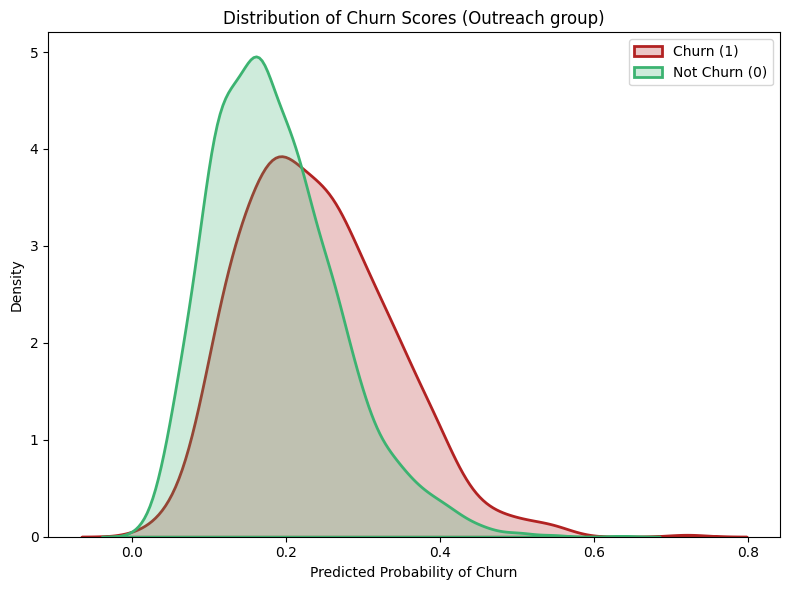

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Use only reached (outreach == 1) group
features = ['1_web_visits_pca', 'dominant_period_of_day_Night', '1_claims_icd_pca', '9_web_visits_pca', 'n_sessions', '20_web_visits_pca', '3_claims_icd_pca', '8_claims_icd_pca', '15_web_visits_pca', '10_web_visits_pca', '12_web_visits_pca', '3_web_visits_pca', '14_web_visits_pca', '23_web_visits_pca', '9_claims_icd_pca', '22_web_visits_pca', '7_claims_icd_pca', '5_claims_icd_pca', '21_web_visits_pca', '17_web_visits_pca']
targets = ['churn']

X_outreach = churn_labels_outreach[features].copy()
y_outreach = churn_labels_outreach[targets].copy().values.ravel()

# Impute missing values with median (robust for this kind of data)
imputer = SimpleImputer(strategy='median')
X_outreach_imputed = imputer.fit_transform(X_outreach)

lr_param_grid = {
    "C": [0.1],
    "penalty": ["l1"],
    "solver": ["liblinear"],  # required for l1 penalty
    "max_iter": [500],
}

lr = LogisticRegression()
clf = GridSearchCV(lr, lr_param_grid, scoring='roc_auc', cv=5)

clf.fit(X_outreach_imputed, y_outreach)

print("Best params:", clf.best_params_)
print("Best mean CV ROC AUC:", clf.best_score_)

# Save both the imputer and the best estimator for future use
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)
joblib.dump(imputer, os.path.join(model_dir, "outreach_imputer.joblib"))
joblib.dump(clf.best_estimator_, os.path.join(model_dir, "outreach_logreg_model.joblib"))
joblib.dump(features, os.path.join(model_dir, "outreach_features.joblib"))
print("Imputer, model, and feature list saved to 'saved_models/' directory.")

# Get predicted (out-of-sample) churn probabilities
scores = clf.best_estimator_.predict_proba(X_outreach_imputed)[:, 1]

# Save the churn_labels_outreach with model scores
churn_labels_outreach_with_pred = churn_labels_outreach.copy()
churn_labels_outreach_with_pred["pred_churn_prob_outreach"] = scores

# Save to disk (csv & feather)
churn_labels_outreach_with_pred.to_csv(os.path.join(model_dir, "outreach_with_churn_predictions.csv"), index=False)
churn_labels_outreach_with_pred.to_feather(os.path.join(model_dir, "outreach_with_churn_predictions.feather"))

# Plot kernel density (distribution) of the model's churn scores, separate for 'churn' and 'not churn'
fig, ax = plt.subplots(figsize=(8, 6))
score_churn = scores[y_outreach == 1]
score_not_churn = scores[y_outreach == 0]

sns.kdeplot(score_churn, fill=True, color='firebrick', lw=2, label='Churn (1)', ax=ax)
sns.kdeplot(score_not_churn, fill=True, color='mediumseagreen', lw=2, label='Not Churn (0)', ax=ax)
ax.set_xlabel('Predicted Probability of Churn')
ax.set_ylabel('Density')
ax.set_title('Distribution of Churn Scores (Outreach group)')
ax.legend()
plt.tight_layout()
plt.show()


Saved not outreach group imputer, model, and feature list to saved_models
Saved DataFrame with churn predictions (not outreach) to saved_models


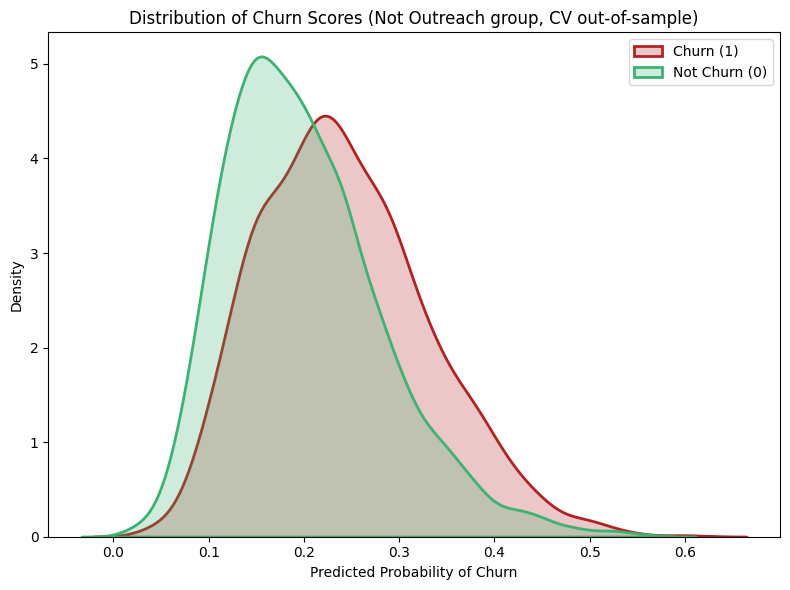

In [18]:
from sklearn.model_selection import StratifiedKFold

# Use only NOT reached (outreach == 0) group
features_not_outreach = features  # keep the same feature list for comparability
targets_not_outreach = ['churn']

X_not_outreach = churn_labels_not_outreach[features_not_outreach].copy()
y_not_outreach = churn_labels_not_outreach[targets_not_outreach].copy().values.ravel()

# Impute missing values with median (use new imputer for this set)
imputer_not_outreach = SimpleImputer(strategy='median')
X_not_outreach_imputed = imputer_not_outreach.fit_transform(X_not_outreach)

# --- Cross-validated churn probabilities (test set only in each split) ---
cv = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)
scores_not_outreach = np.zeros_like(y_not_outreach, dtype=float)

for train_idx, test_idx in cv.split(X_not_outreach_imputed, y_not_outreach):
    clf_not_outreach = LogisticRegression(C=0.1, penalty="l1", solver="liblinear", max_iter=500)
    # Fit on CV-imputed training set
    X_tr, X_te = X_not_outreach_imputed[train_idx], X_not_outreach_imputed[test_idx]
    y_tr = y_not_outreach[train_idx]
    clf_not_outreach.fit(X_tr, y_tr)
    # Get test set predicted churn probabilities
    scores_not_outreach[test_idx] = clf_not_outreach.predict_proba(X_te)[:, 1]

# --- Train final model on all "not outreach" data, and save the model + imputer + feature list ---
final_clf_not_outreach = LogisticRegression(C=0.1, penalty="l1", solver="liblinear", max_iter=500)
final_clf_not_outreach.fit(X_not_outreach_imputed, y_not_outreach)

output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)
joblib.dump(imputer_not_outreach, os.path.join(output_dir, "not_outreach_imputer.joblib"))
joblib.dump(final_clf_not_outreach, os.path.join(output_dir, "not_outreach_logreg_model.joblib"))
joblib.dump(features_not_outreach, os.path.join(output_dir, "not_outreach_features.joblib"))
print("Saved not outreach group imputer, model, and feature list to", output_dir)

# Save the DataFrame with cross-validated churn predictions for each member (not outreach group)
df_not_outreach_with_pred = churn_labels_not_outreach.copy()
df_not_outreach_with_pred["cv_pred_churn_prob_not_outreach"] = scores_not_outreach

# Optionally save to disk (as csv & feather for fast loading)
df_not_outreach_with_pred.to_csv(os.path.join(output_dir, "not_outreach_with_churn_predictions.csv"), index=False)
df_not_outreach_with_pred.to_feather(os.path.join(output_dir, "not_outreach_with_churn_predictions.feather"))

print("Saved DataFrame with churn predictions (not outreach) to", output_dir)

# Plot kernel density (distribution) of the model's churn scores, separate for 'churn' and 'not churn'
fig, ax = plt.subplots(figsize=(8, 6))
score_churn_not_outreach = scores_not_outreach[y_not_outreach == 1]
score_not_churn_not_outreach = scores_not_outreach[y_not_outreach == 0]

sns.kdeplot(score_churn_not_outreach, fill=True, color='firebrick', lw=2, label='Churn (1)', ax=ax)
sns.kdeplot(score_not_churn_not_outreach, fill=True, color='mediumseagreen', lw=2, label='Not Churn (0)', ax=ax)
ax.set_xlabel('Predicted Probability of Churn')
ax.set_ylabel('Density')
ax.set_title('Distribution of Churn Scores (Not Outreach group, CV out-of-sample)')
ax.legend()
plt.tight_layout()
plt.show()

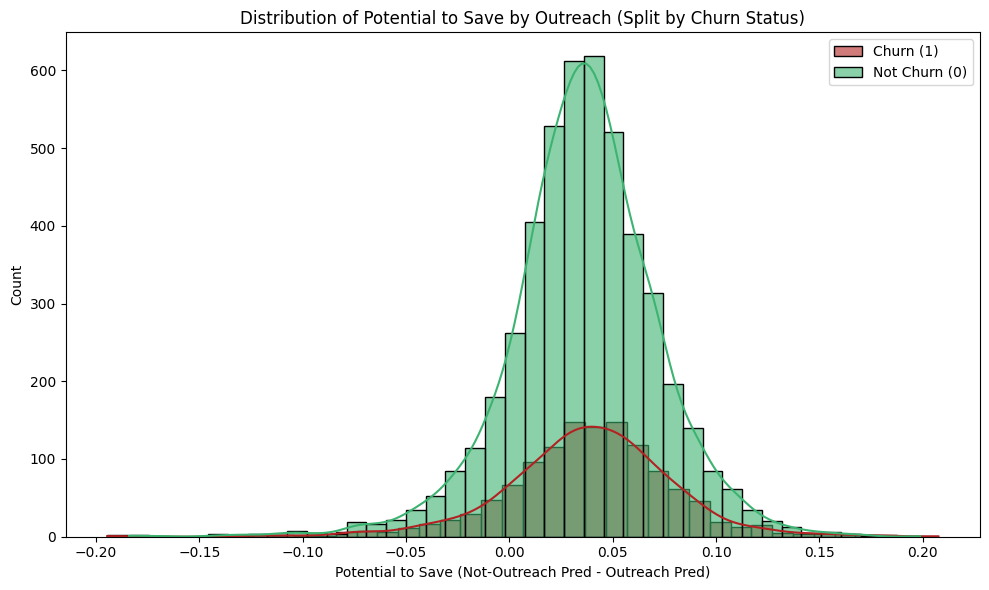

All outreach candidates saved to results/all_outreach_candidates.csv
     id     score  rank
0  4590  0.198745     1
1  3159  0.174379     2
2  1032  0.168192     3
3  4784  0.167891     4
4  5668  0.166745     5


,member_id,signup_date,churn,outreach,n_sessions,sessions_vs_median,log_sessions_vs_median,std_sessions_per_day,active_days_normalized,dominant_period_of_day,...,7_claims_icd_pca,8_claims_icd_pca,9_claims_icd_pca,10_claims_icd_pca,dominant_period_of_day_Night,dominant_period_of_day_Day,dominant_period_of_day_Evening,cv_pred_churn_prob_not_outreach,pred_churn_prob_from_outreach_model,potential_to_save
0,1,2024-04-12,0,0,6.0,0.6,0.470004,0.000000,0.428571,Day,...,-1.589166,-0.669947,0.093225,-6.680343e-15,0,1,0,0.130676,0.183406,-0.052730
1,2,2025-03-11,0,0,10.0,1.0,0.693147,0.786796,0.500000,Evening,...,-0.310045,0.886502,0.672074,4.421887e-15,0,0,1,0.049812,0.032108,0.017704
2,3,2024-09-27,0,0,9.0,0.9,0.641854,0.353553,0.571429,Night,...,-0.014320,2.007541,-2.109301,2.279216e-15,1,0,0,0.237398,0.139227,0.098171
3,4,2024-04-16,1,0,10.0,1.0,0.693147,0.462910,0.571429,Day,...,-1.228815,-1.313458,-0.171992,-3.493943e-15,0,1,0,0.160693,0.128361,0.032332
5,6,2024-01-21,0,0,11.0,1.1,0.741937,0.440959,0.642857,Evening,...,-0.584598,-0.554533,0.998556,-2.340498e-15,0,0,1,0.092131,0.085786,0.006345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,2025-01-29,0,0,9.0,0.9,0.641854,0.487950,0.500000,Night,...,-1.201574,-0.798622,-0.207314,-6.096513e-16,1,0,0,0.222569,0.203935,0.018634
9995,9996,2024-09-02,0,0,8.0,0.8,0.587787,0.816497,0.428571,Evening,...,0.373883,-0.789238,1.087892,-6.751638e-16,0,0,1,0.115896,0.064250,0.051647
9996,9997,2024-02-07,0,0,11.0,1.1,0.741937,0.744024,0.571429,Evening,...,-0.507610,1.673946,1.101322,4.663908e-15,0,0,1,0.162144,0.092505,0.069640
9997,9998,2024-09-01,0,0,12.0,1.2,0.788457,0.632456,0.428571,Evening,...,-0.062232,0.235228,0.443227,-5.791097e-15,0,0,1,0.251758,0.146390,0.105369


In [19]:
# Load the saved imputer, model, and features for the outreach group
model_dir = "saved_models"
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)
outreach_imputer = joblib.load(os.path.join(model_dir, "outreach_imputer.joblib"))
outreach_model = joblib.load(os.path.join(model_dir, "outreach_logreg_model.joblib"))
outreach_features = joblib.load(os.path.join(model_dir, "outreach_features.joblib"))

# Select & impute feature values for not_outreach group, using outreach feature list and outreach imputer/model
X_not_outreach_for_outreach_model = df_not_outreach_with_pred[outreach_features]
X_not_outreach_imputed_for_outreach_model = outreach_imputer.transform(X_not_outreach_for_outreach_model)

# Get predicted probabilities from outreach model on not_outreach data
outreach_model_pred_probs = outreach_model.predict_proba(X_not_outreach_imputed_for_outreach_model)[:, 1]

# Add as new column
df_not_outreach_with_pred["pred_churn_prob_from_outreach_model"] = outreach_model_pred_probs

# Compute and add the "potential to save" column: difference 
# (how much outreach could potentially decrease a member's churn probability)
df_not_outreach_with_pred["potential_to_save"] = (
    df_not_outreach_with_pred["cv_pred_churn_prob_not_outreach"]
    - df_not_outreach_with_pred["pred_churn_prob_from_outreach_model"]
)

# Split into churn and not churn groups for analysis/visualization
df_churn = df_not_outreach_with_pred[df_not_outreach_with_pred["churn"] == 1]
df_not_churn = df_not_outreach_with_pred[df_not_outreach_with_pred["churn"] == 0]

# Show histograms of "potential to save" for both groups
plt.figure(figsize=(10, 6))
sns.histplot(df_churn["potential_to_save"], bins=40, kde=True, color='firebrick', label='Churn (1)', alpha=0.6)
sns.histplot(df_not_churn["potential_to_save"], bins=40, kde=True, color='mediumseagreen', label='Not Churn (0)', alpha=0.6)
plt.xlabel("Potential to Save (Not-Outreach Pred - Outreach Pred)")
plt.ylabel("Count")
plt.title("Distribution of Potential to Save by Outreach (Split by Churn Status)")
plt.legend()
plt.tight_layout()
plt.show()

# Create outreach prioritization DataFrame for churn==False
df_top_outreach = (
    df_not_outreach_with_pred[df_not_outreach_with_pred["churn"] == 0]
    .loc[:, ["member_id", "potential_to_save"]]
    .copy()
)
df_top_outreach = df_top_outreach.sort_values("potential_to_save", ascending=False).reset_index(drop=True)
df_top_outreach["rank"] = df_top_outreach["potential_to_save"].rank(method="first", ascending=False).astype(int)
df_top_outreach = df_top_outreach.rename(columns={"member_id": "id", "potential_to_save": "score"})
df_top_outreach = df_top_outreach[["id", "score", "rank"]].sort_values("rank")

# Save the prioritization DataFrame to CSV in the results folder
df_top_outreach.to_csv(os.path.join(results_dir, "all_outreach_candidates.csv"), index=False)

# Optionally, print out the first few rows
print(f"All outreach candidates saved to {os.path.join(results_dir, 'all_outreach_candidates.csv')}")
print(df_top_outreach.head())

df_not_outreach_with_pred

In [25]:
df_top_outreach.head(5)

,id,score,rank
0,4590,0.198745,1
1,3159,0.174379,2
2,1032,0.168192,3
3,4784,0.167891,4
4,5668,0.166745,5


In [26]:
df_top_outreach.tail(5)


,id,score,rank
4763,19,-0.137634,4764
4764,6287,-0.145452,4765
4765,2389,-0.169267,4766
4766,8064,-0.180072,4767
4767,6466,-0.184052,4768


Chance to churn by signup_date_bin and chance_to_improve_bin (outreach observed):
   signup_date_bin chance_to_improve_bin  chance_to_churn
0         Earliest                   Low         0.142857
1         Earliest                Medium         0.104972
2         Earliest                  High         0.073733
3         Earliest             Very High         0.096618
4            Early                   Low         0.165803
5            Early                Medium         0.185930
6            Early                  High         0.131068
7            Early             Very High         0.180000
8              Mid                   Low         0.267677
9              Mid                Medium         0.197115
10             Mid                  High         0.156566
11             Mid             Very High         0.141361
12            Late                   Low         0.300000
13            Late                Medium         0.179487
14            Late                  High        

/var/folders/5j/q5gswhks43xd2b8qncz5699m0000gn/T/ipykernel_63747/3224492986.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["signup_date_bin", "chance_to_improve_bin"])
/var/folders/5j/q5gswhks43xd2b8qncz5699m0000gn/T/ipykernel_63747/3224492986.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("signup_date_bin")["churn"]


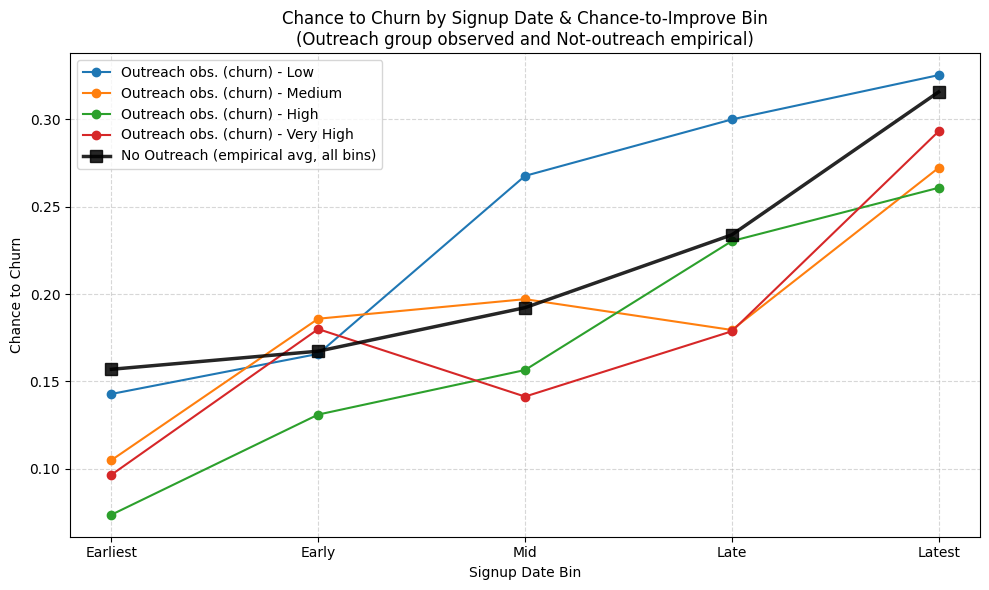


Proportion z-test: Outreach group (by chance_to_improve_bin) vs Baseline (Not-outreach):


,chance_to_improve_bin,group_n,group_churns,group_mean,not_outreach_n,not_outreach_churns,not_outreach_mean,z_stat,p_value
0,Low,996,241,0.2420,6016,1248,0.2074,2.467481,0.013607
1,Medium,996,190,0.1908,6016,1248,0.2074,-1.207912,0.227081
2,High,996,166,0.1667,6016,1248,0.2074,-2.971065,0.002968
3,Very High,996,176,0.1767,6016,1248,0.2074,-2.233700,0.025503


,member_id,signup_date,churn,outreach,n_sessions,sessions_vs_median,log_sessions_vs_median,std_sessions_per_day,active_days_normalized,dominant_period_of_day,...,9_claims_icd_pca,10_claims_icd_pca,dominant_period_of_day_Night,dominant_period_of_day_Day,dominant_period_of_day_Evening,pred_churn_prob_outreach,pred_churn_prob_from_not_outreach_model,chance_to_improve,chance_to_improve_bin,signup_date_bin
4,5,2024-03-12,0,1,10.0,1.0,0.693147,0.462910,0.571429,Day,...,-1.153545,3.543450e-15,0,1,0,0.106833,0.184790,0.077957,Very High,Earliest
6,7,2024-05-01,0,1,13.0,1.3,0.832909,1.060660,0.571429,Evening,...,0.446825,-5.086303e-16,0,0,1,0.174720,0.229723,0.055003,High,Early
7,8,2025-04-11,0,1,4.0,0.4,0.336472,0.577350,0.214286,Night,...,-0.230761,3.137351e-15,1,0,0,0.157640,0.278550,0.120910,Very High,Latest
8,9,2024-08-02,1,1,7.0,0.7,0.530628,0.547723,0.357143,Night,...,-1.191629,2.808148e-16,1,0,0,0.285313,0.264663,-0.020651,Low,Mid
10,11,2025-04-03,1,1,11.0,1.1,0.741937,1.643168,0.357143,Day,...,0.256781,-2.403550e-15,0,1,0,0.263877,0.275814,0.011938,Medium,Latest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,2024-05-11,0,1,12.0,1.2,0.788457,0.707107,0.642857,Night,...,0.417504,4.055573e-15,1,0,0,0.082236,0.088181,0.005945,Low,Early
9989,9990,2025-04-09,0,1,12.0,1.2,0.788457,0.894427,0.428571,Night,...,0.191002,1.593253e-15,1,0,0,0.062704,0.092675,0.029971,Medium,Latest
9991,9992,2024-10-28,0,1,9.0,0.9,0.641854,1.303840,0.357143,Night,...,1.607352,-5.529278e-15,1,0,0,0.153332,0.223226,0.069893,Very High,Mid
9994,9995,2024-04-29,0,1,8.0,0.8,0.587787,0.894427,0.357143,Night,...,-0.597360,-3.107653e-15,1,0,0,0.251103,0.307031,0.055928,Very High,Early


In [22]:
# Run the not_outreach model on outreach group as well
# Load saved not_outreach imputer, model, and feature list
not_outreach_imputer = joblib.load(os.path.join(model_dir, "not_outreach_imputer.joblib"))
not_outreach_model = joblib.load(os.path.join(model_dir, "not_outreach_logreg_model.joblib"))
not_outreach_features = joblib.load(os.path.join(model_dir, "not_outreach_features.joblib"))

# Select & impute feature values for outreach group using not_outreach features/imputer/model
X_outreach_for_not_outreach_model = churn_labels_outreach_with_pred[not_outreach_features]
X_outreach_imputed_for_not_outreach_model = not_outreach_imputer.transform(X_outreach_for_not_outreach_model)

# Get predicted probabilities from not_outreach model on outreach data
not_outreach_model_pred_probs = not_outreach_model.predict_proba(X_outreach_imputed_for_not_outreach_model)[:, 1]

# Add as new column
churn_labels_outreach_with_pred["pred_churn_prob_from_not_outreach_model"] = not_outreach_model_pred_probs

# Compute and add the "chance to improve" column: pred_churn_prob_from_not_outreach_model - pred_churn_prob_outreach
churn_labels_outreach_with_pred["chance_to_improve"] = (
    churn_labels_outreach_with_pred["pred_churn_prob_from_not_outreach_model"]
    - churn_labels_outreach_with_pred["pred_churn_prob_outreach"]
)

# Bin 'chance_to_improve' into 4 quantiles, larger = better
churn_labels_outreach_with_pred["chance_to_improve_bin"] = pd.qcut(
    churn_labels_outreach_with_pred["chance_to_improve"], 
    q=4, 
    labels=["Low", "Medium", "High", "Very High"]
)

# Bin signup_date into 5 quantiles and add as a new column
churn_labels_outreach_with_pred["signup_date"] = pd.to_datetime(churn_labels_outreach_with_pred["signup_date"])
signup_date_labels_5 = ["Earliest", "Early", "Mid", "Late", "Latest"]
churn_labels_outreach_with_pred["signup_date_bin"] = pd.qcut(
    churn_labels_outreach_with_pred["signup_date"].astype(int, errors='ignore'), 
    q=5, 
    labels=signup_date_labels_5
)

# Calculate the chance to churn *in outreach* per 'signup_date_bin' and 'chance_to_improve_bin'
bin_churn_stats = (
    churn_labels_outreach_with_pred
    .groupby(["signup_date_bin", "chance_to_improve_bin"])
    ["churn"]
    .mean()
    .reset_index()
    .rename(columns={"churn": "chance_to_churn"})
)

print("Chance to churn by signup_date_bin and chance_to_improve_bin (outreach observed):")
print(bin_churn_stats)

# For not_outreach group, calculate, for each signup_date_bin, the empirical chance to churn (no predictions/models at all)
df_not_outreach_with_pred = df_not_outreach_with_pred.copy()  # to avoid SettingWithCopy warnings
df_not_outreach_with_pred["signup_date"] = pd.to_datetime(df_not_outreach_with_pred["signup_date"])
# Use the same bin edges as outreach for signup_date (now with 5 bins)
bin_edges = pd.qcut(
    churn_labels_outreach_with_pred["signup_date"].astype(int, errors='ignore'),
    q=5, 
    retbins=True
)[1]
df_not_outreach_with_pred["signup_date_bin"] = pd.cut(
    df_not_outreach_with_pred["signup_date"].astype(int, errors='ignore'),
    bins=bin_edges,
    labels=signup_date_labels_5,
    include_lowest=True
)
emp_churn_period = (
    df_not_outreach_with_pred
    .groupby("signup_date_bin")["churn"]
    .mean()
    .reset_index()
    .rename(columns={"churn": "empirical_chance_to_churn"})
)

# Visualize: x-axis signup_date, hue=chance_to_improve_bin, y=chance to churn (mean churn)
plt.figure(figsize=(10, 6))
for label in ["Low", "Medium", "High", "Very High"]:
    data_empirical = bin_churn_stats[bin_churn_stats["chance_to_improve_bin"] == label]
    plt.plot(
        data_empirical["signup_date_bin"], 
        data_empirical["chance_to_churn"],
        marker="o",
        label=f"Outreach obs. (churn) - {label}"
    )
# Add the empirical 'not-outreach' average (across all potential_to_save levels) as a black bold line on top
plt.plot(
    emp_churn_period["signup_date_bin"], 
    emp_churn_period["empirical_chance_to_churn"],
    color="black",
    marker="s",
    linestyle="-",
    linewidth=2.5,
    markersize=8,
    label="No Outreach (empirical avg, all bins)",
    alpha=0.85,
    zorder=10
)

plt.xlabel("Signup Date Bin")
plt.ylabel("Chance to Churn")
plt.title("Chance to Churn by Signup Date & Chance-to-Improve Bin\n(Outreach group observed and Not-outreach empirical)")
plt.legend()
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --------
# Statistical test comparing each chance_to_improve_bin group (all periods pooled) to the not_outreach baseline (all periods pooled).
# proportions_ztest has moved; import from statsmodels.stats.proportion instead.
from statsmodels.stats.proportion import proportions_ztest
import warnings

# For each chance_to_improve_bin, aggregate all members (regardless of signup_date_bin)
stat_results = []
bin_labels = ["Low", "Medium", "High", "Very High"]

# Get all not_outreach group churn outcomes (pooled, baseline)
not_outreach_churn = df_not_outreach_with_pred['churn']
not_outreach_n = not_outreach_churn.notna().sum()
not_outreach_events = not_outreach_churn.sum()

for label in bin_labels:
    group = churn_labels_outreach_with_pred[churn_labels_outreach_with_pred["chance_to_improve_bin"] == label]
    group_churn = group["churn"]
    n_group = group_churn.notna().sum()
    n_events = group_churn.sum()

    count = np.array([n_events, not_outreach_events])
    nobs = np.array([n_group, not_outreach_n])

    # Suppress ValueWarnings from statsmodels if encountered
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        stat, pval = proportions_ztest(count, nobs)
    stat_results.append({
        "chance_to_improve_bin": label,
        "group_n": n_group,
        "group_churns": n_events,
        "group_mean": np.round(group_churn.mean(),4),
        "not_outreach_n": not_outreach_n,
        "not_outreach_churns": not_outreach_events,
        "not_outreach_mean": np.round(not_outreach_churn.mean(),4),
        "z_stat": stat,
        "p_value": pval
    })

stat_results_df = pd.DataFrame(stat_results)
print("\nProportion z-test: Outreach group (by chance_to_improve_bin) vs Baseline (Not-outreach):")
display(stat_results_df)

churn_labels_outreach_with_pred